# **Telco Customer Churn**

**Capstone Project Modul 3**

Created by: Ergidya Liviani

## **Business Problem**

**Context**

Dataset ini berisi profil pelanggan yang telah berhenti berlangganan dari perusahaan telekomunikasi. Dalam industri telekomunikasi dan layanan berbasis langganan lainnya, istilah "churn" berarti kondisi ketika pelanggan memutuskan untuk tidak lagi menggunakan layanan dari penyedia tersebut. Churn dapat terjadi karena berbagai alasan, seperti ketidakpuasan terhadap layanan, biaya yang dianggap terlalu tinggi, atau adanya penawaran yang lebih menarik dari pesaing. Analisis churn sangat penting bagi perusahaan untuk memahami pola perilaku pelanggan, mengidentifikasi faktor-faktor penyebab churn, serta merancang strategi yang efektif untuk meningkatkan retensi pelanggan.

**Problem Statement**

Churn merupakan tantangan besar yang tidak dapat dihindari dan dapat memberikan dampak besar pada pertumbuhan dan pendapatan perusahaan telekomunikasi. Jika perusahaan tidak dapat menemukan alasan dan karakteristik dari customer yang beresiko churn, maka strategi retensi (penahanan) tidak efektif dan menyebabkan churn rate terus meningkat, yang mana akan sangat merugikan perusahaan. <u>Manajemen perusahaan</u> yang bertanggung jawab atas keberlanjutan bisnis, dan <u>tim pemasaran dan customer experience</u> yang perlu memahami perilaku pelanggan untuk meningkatkan layanan dan program loyalitas dapat terpengaruh karena churn yang tinggi. Selain itu, <u>tim keuangan</u> juga terpengaruh karena penurunan pendapatan hingga X% dapat menyebabkan biaya akuisisi pelanggan baru (Customer Acquisition Costs) meningkat. Oleh karena itu, masalah ini perlu untuk segera diatasi untuk mengurangi dampak finansial, meningkatkan kepuasan pelanggan, dan memperkuat daya saing di industri telekomunikasi. Melalui analisis atau pendekatan berbasis data, perusahaan dapat memahami faktor penyebab churn dengan lebih baik dan menentukan strategi retensi yang tepat sehingga churn rate dapat ditekan. 


**Goals**

Berdasarkan permasalahan tersebut, berikut adalah beberapa tujuan yang ingin dicapai:
+ Mendeteksi pelanggan yang memiliki kemungkinan untuk churn
+ Mengidentifikasi karakteristik dan faktor utama yang menyebabkan pelanggan churn
+ Mengurangi churn rate dengan strategi retensi pelanggan
+ Meningkatkan retensi pelanggan dan kepuasan pelanggan

**Analytical Approach**

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin bekerja di perusahaan tersebut atau tidak.

Dilakukan analisis data dengan tujuan untuk menemukan pola antara pelanggan yang cenderung tetap berlangganan dengan perusahaan dan pelanggan yang kemungkinan besar akan berhenti berlangganan (churn). Dengan tahapan analisis sebagai berikut:
1. Data Understanding
2. Data Preprocessing:
    + Data Cleaning
    + Visualization
    + Feature Engineering
    + Feature Selection
3. Modeling & Training
4. Model Optimalization
5. Conclusion & Recommendation

**Metric Evaluation**

Evaluasi kesalahan model:
- Type 1 Error (False Positive): Model memprediksi bahwa pelanggan akan churn (Yes), tetapi secara aktual pelanggan tetap berlangganan atau tidak churn (No)
    + Konsekuensi : Pemborosan biaya dan sumber daya. Contohnya, apabila perusahaan mengalokasikan sumber daya untuk menawarkan promosi atau insentif retensi kepada pelanggan yang sebenarnya tidak akan churn. 
- Type 2 Error (False Negative) : Model memprediksi bahwa pelanggan akan tetap berlangganan atau tidak churn (No), tetapi secara aktual pelanggan churn (Yes)
    + Konsekuensi : Kehilangan peluang untuk mencegah pelanggan berhenti berlangganan dan dapat berdampak negatif pada pendapatan dan pertumbuhan bisnis. 

Berdasarkan konsekuensi tersebut, tujuan yang ingin dicapai dalam analisis ini adalah mampu memprediksi pelanggan yang akan churn dengan akurasi tinggi, tetapi tanpa menyebabkan biaya retensi yang tidak perlu. Oleh sebab itu, metrik evaluasi yang digunakan dalam analisis ini adalah:
1. Recall

Recall adalah proporsi kasus positif yang diprediksi benar dibandingkan dengan total kasus positif. 

2. F1-Score

F1-score adalah rata-rata antara precision dan recall untuk menyeimbangkan keduanya. 

3. AUC-ROC

AUC-ROC digunakan untuk mengukur model dalam membedakan antara kelas positif dan negatif di berbagai threshold. 

Dalam analisis ini digunakan metrik evaluasi recall sebagai metrik utama untuk meminimalkan FN atau memprediksi pelanggan yang sebenarnya akan churn sehingga perusahaan dapat melakukan tindakan pencegahan. Selain itu, dalam analisis ini digunakan F1-score dan AUC-ROC sebagai penguat output. F1-score digunakan untuk memastikan model tidak hanya menangkap churn tetapi juga memperhatikan akurasi dalam memprediksi dan digunakan AUC-ROC untuk mengevaluasi apakah model dengan recall tinggi juga memiliki performa yang baik secara keseluruhan. 

## **Data Understanding**

In [152]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import shap

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Model Selection
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline

# Imbalanced Data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# Model Selection & Evaluation
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score

In [3]:
# Load Data
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
df.shape

(4930, 11)

In [6]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [7]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


- Mayoritas pelanggan tidak menggunakan layanan tambahan (OnlineSecurity, OnlineBackup, dan lain-lain), yang bisa menjadi peluang bagi perusahaan untuk meningkatkan penjualan tambahan dengan strategi pemasaran yang lebih agresif.
- Pelanggan dengan Fiber Optic lebih banyak, yang mungkin karena kecepatan yang lebih tinggi. 
- Sebagian besar pelanggan membayar lebih dari $70 per bulan, yang menunjukkan potensi churn lebih tinggi jika mereka merasa biaya terlalu mahal dibandingkan dengan manfaat yang diperoleh.
- Pelanggan baru (tenure rendah) lebih banyak dibandingkan pelanggan lama, yang berarti ada tantangan dalam mempertahankan pelanggan dalam beberapa bulan pertama layanan.

### Dataset Information

| **Column Name**       | **Description**                                              | **Data Type** |
|-----------------------|--------------------------------------------------------------|--------------|
| Dependents        | Apakah pelanggan memiliki tanggungan (anak, pasangan, dll.) atau tidak.            | Object       |
| tenure            | Lama pelanggan berlangganan dalam bulan.    | Integer (int64) |
| OnlineSecurity    | Apakah pelanggan berlangganan layanan keamanan online          | Object       |
| OnlineBackup      | Apakah pelanggan memiliki layanan backup online       | Object       |
| InternetService   | Jenis layanan internet yang digunakan            | Object       |
| DeviceProtection  | Apakah pelanggan memiliki perlindungan perangkat          | Object       |
| TechSupport       | Apakah pelanggan memiliki dukungan teknis          | Object       |
| Contract          | Jenis kontrak pelanggan | Object       |
| PaperlessBilling  | Apakah pelanggan menggunakan sistem tagihan tanpa kertas     | Object       |
| MonthlyCharges    | Biaya bulanan yang harus dibayar pelanggan. | Float (float64) |
| Churn            | Apakah pelanggan berhenti berlangganan atau tidak          | Object       |


- Data terdiri dari 4930 baris dan 11 kolom
- Data terdiri dari 9 variabel kategorik dan 2 variabel numerik
- Variabel target atau dependen: Churn

## **Data Preprocessing**

### Data Cleaning

Data cleaning merupakan salah satu tahapan dalam analisis dengan tujuan untuk meningkatkan akurasi model. Berikut adalah tahapan dalam data cleaning:

1. Mendeteksi dan menghapus duplikasi data
2. Mendeteksi dan mengatasi missing value
3. Memeriksa dan menangani inkonsistensi data
4. Mendeteksi dan mengatasi outlier

#### Check and Remove Duplicate Values

Tahapan ini dilakukan untuk meningkatkan akurasi model dan mengoptimalkan kinerja komputasi. Selain itu, adanya duplikasi data dapat menyebabkan bias dalam analisis, model mengalami overfitting.

In [8]:
# Check Duplicates
df.duplicated().sum()

77

In [9]:
# Percentage of Target Variable Before Remove Duplicate Data
df['Churn'].value_counts() / len(df) * 100

No     73.306288
Yes    26.693712
Name: Churn, dtype: float64

In [10]:
# show duplicate values
duplicated = df.duplicated()
df[duplicated].head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No


In [11]:
# example duplicates value
df[(df['OnlineSecurity'] == 'No internet service') & (df['tenure']==1) & (df['MonthlyCharges']==19.65)]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
187,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
604,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,Yes
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
1429,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.65,No
3801,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
4717,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,Yes


In [12]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
# Percentage of Target Variable After Remove Duplicate Data
df['Churn'].value_counts() / len(df) * 100

No     73.459716
Yes    26.540284
Name: Churn, dtype: float64

Data ini terdapat 77 data duplikasi. Duplikasi dapat memberi dampak buruk karena dapat memberikan hasil yang bias dan menyebabkan hasil prediksi yang tidak akurat. Oleh karena itu, duplikasi dihapus. Selain itu, berdasarkan persentase variabel target dapat diketahui bahwa setelah duplikasi dihapus tidak terdapat perbedaan yang signifikan. 

#### Check and Handle Missing Values

Mendeteksi dan mengatasi missing value dilakukan untuk menghindari adanya bias dan mencegah terjadinya error.

In [14]:
# check missing value
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Data tidak ditemukan missing value.

#### Check and Handle Data Inconsistencies

Tahapan ini dilakukan untuk memastikan keseragaman data dan mengurangi error ketika analsis. 

In [15]:
df['Dependents'].value_counts()

No     3380
Yes    1473
Name: Dependents, dtype: int64

In [16]:
df['OnlineSecurity'].value_counts()

No                     2420
Yes                    1430
No internet service    1003
Name: OnlineSecurity, dtype: int64

In [17]:
df['OnlineBackup'].value_counts()

No                     2148
Yes                    1702
No internet service    1003
Name: OnlineBackup, dtype: int64

In [18]:
df['InternetService'].value_counts()

Fiber optic    2154
DSL            1696
No             1003
Name: InternetService, dtype: int64

In [19]:
df['DeviceProtection'].value_counts()

No                     2162
Yes                    1688
No internet service    1003
Name: DeviceProtection, dtype: int64

In [20]:
df['TechSupport'].value_counts()

No                     2442
Yes                    1408
No internet service    1003
Name: TechSupport, dtype: int64

In [21]:
df['Contract'].value_counts()

Month-to-month    2665
Two year          1143
One year          1045
Name: Contract, dtype: int64

In [22]:
df['PaperlessBilling'].value_counts()

Yes    2925
No     1928
Name: PaperlessBilling, dtype: int64

In [23]:
df['Churn'].value_counts()

No     3565
Yes    1288
Name: Churn, dtype: int64

Variabel OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport memiliki tiga kategori nilai, yaitu `Yes`, `No`, dan `No internet service`. Nilai `No internet service` dapat diasumsikan sebagai `No`. Hal ini karena jika pelanggan tidak memiliki layanan internet (`No internet service`), maka secara otomatis tidak berlangganan layanan keamanan online dan backup online, serta tidak memiliki perlindungan perangkat dan dukungan teknis. Oleh sebab itu, nilai `No internet service` dapat diganti atau disamakan dengan `No`.

In [24]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df[cols] = df[cols].replace({'No internet service': 'No'})
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


In [25]:
for col in cols:
    print(f"{col}:\n{df[col].value_counts()}\n")

OnlineSecurity:
No     3423
Yes    1430
Name: OnlineSecurity, dtype: int64

OnlineBackup:
No     3151
Yes    1702
Name: OnlineBackup, dtype: int64

DeviceProtection:
No     3165
Yes    1688
Name: DeviceProtection, dtype: int64

TechSupport:
No     3445
Yes    1408
Name: TechSupport, dtype: int64



Nilai `No internet service` pada keempat variabel telah diganti atau disamakan dengan `No`. 

#### Check and Handle Outlier

Memeriksa adalah salah satu tahapan penting sebelum analisis karena outlier dapat memberikan hasil yang berbeda dibandingkan data tanpa outlier. Terdapat beberapa metode untuk mendeteksi outlier, seperti visualisasi data, metode IQR untuk distribusi tidak normal, dan metode Z-Score untuk distribusi normal. 

In [26]:
num = df[['tenure', 'MonthlyCharges']]
num

,tenure,MonthlyCharges
0,9,72.90
1,14,82.65
2,64,47.85
3,72,69.65
4,3,23.60
...,...,...
4925,15,103.45
4926,10,91.10
4927,58,20.75
4928,1,69.75


Untuk memeriksa data berdistribusi normal atau tidak, digunakan visualisasi dan uji statistik. 

C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_17916\3175961955.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num['tenure'], kde_kws = {'bw' : 0.1}, color="orange", ax=axs[0])
c:\Users\ERGIDYA LIVIANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_179

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

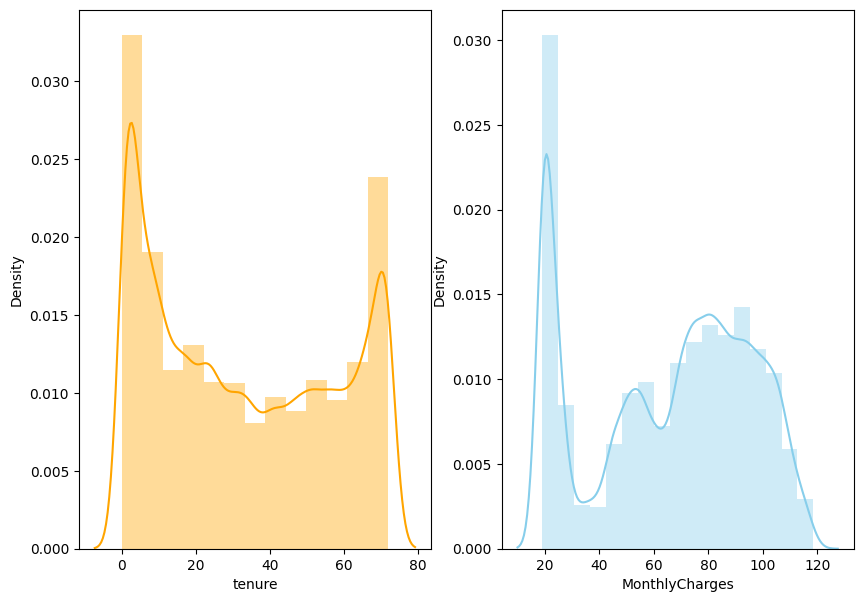

In [27]:
# histogram with density plot

fig, axs = plt.subplots(1, 2, figsize=(10, 7))
sns.distplot(num['tenure'], kde_kws = {'bw' : 0.1}, color="orange", ax=axs[0])
sns.distplot(num['MonthlyCharges'], kde_kws = {'bw' : 0.1}, color="skyblue", ax=axs[1])

Berdasarkan visualisasi tersebut, dapat dilihat bahwa secara visual data tidak berdistribusi normal. Namun, untuk memastikan lebih lanjut, digunakan uji statistik Kolmogorov-Smirnov. Digunakan uji ini dibandingkan uji Shapiro-Wilk karena uji ini lebih baik digunakan pada data dengan jumlah besar. 

In [28]:
for col in num:
    stat, p_value = stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    
    print(f"Kolmogorov-Smirnov Test {col}:")
    print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Tolak H0: Data tidak berdistribusi normal.\n")
    else:
        print("Gagal Tolak H0: Data berdistribusi normal.\n")

Kolmogorov-Smirnov Test tenure:
  Statistic: 0.1065, P-value: 0.0000
Tolak H0: Data tidak berdistribusi normal.

Kolmogorov-Smirnov Test MonthlyCharges:
  Statistic: 0.1208, P-value: 0.0000
Tolak H0: Data tidak berdistribusi normal.



Data tidak berdistribusi normal pada data numerik, sehingga digunakan metode IQR dan visualisasi boxplot untuk mendeteksi outlier.

In [29]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

In [30]:
outlier_dict = detect_outliers_iqr(num)
outlier_results = {col: list(values.index) for col, values in outlier_dict.items()}
outlier_list = []
for col, indices in outlier_results.items():
    outlier_list.append({'Variabel': col, 'Jumlah Outlier': len(indices)})

outlier_df = pd.DataFrame(outlier_list)
outlier_df

,Variabel,Jumlah Outlier
0,tenure,0
1,MonthlyCharges,0


<Axes: ylabel='MonthlyCharges'>

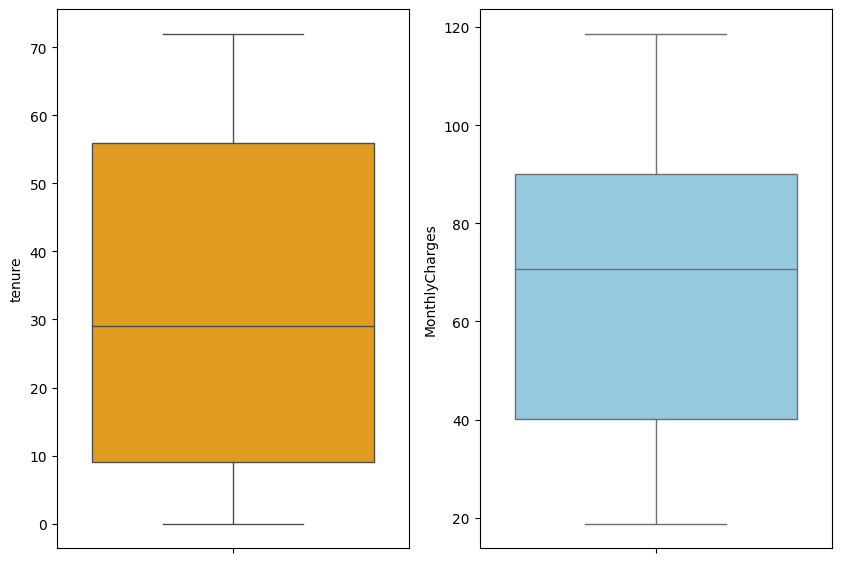

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
sns.boxplot(data = num['tenure'], color="orange", ax=axs[0])
sns.boxplot(data = num['MonthlyCharges'], color="skyblue", ax=axs[1])

Secara visualisasi boxplot dan metode IQR dapat disimpulkan bahwa tidak terdapat outlier pada data numerik. 

### Visualization

C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_17916\1967719918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='mako', ax=axes[0, 0])
C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_17916\1967719918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='mako', ax=axes[0, 2])


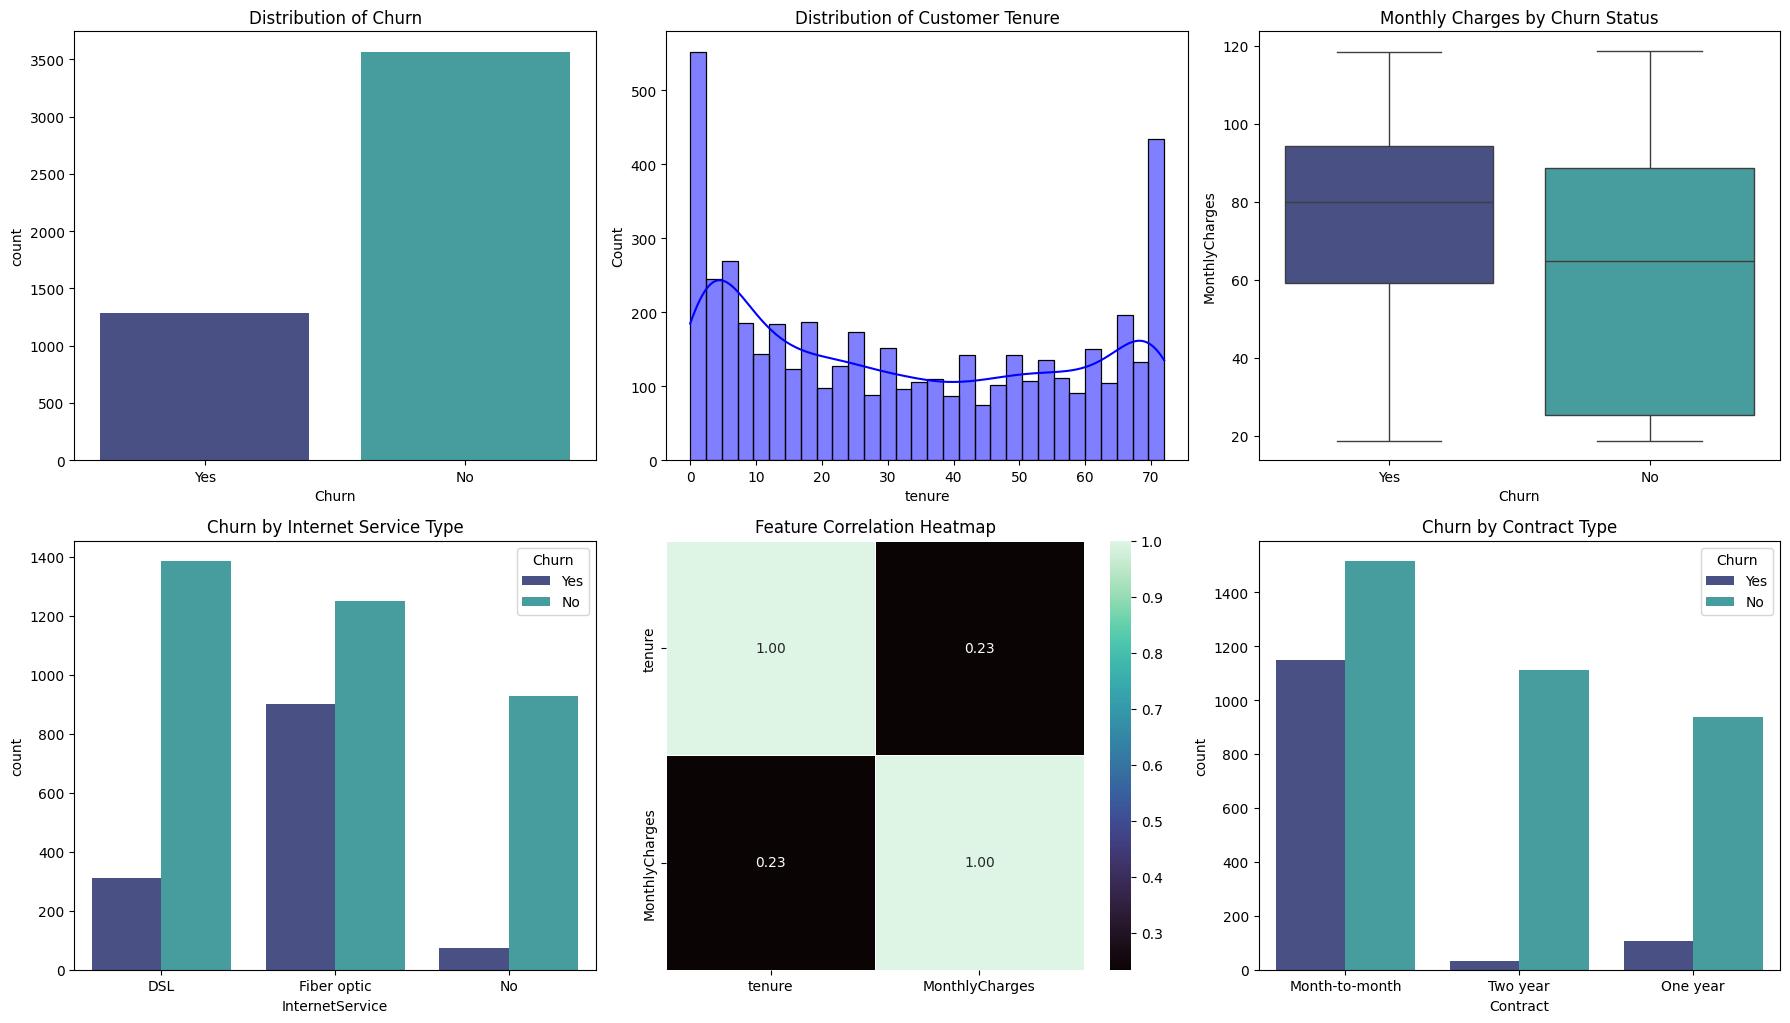

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 baris, 3 kolom

# Distribusi Churn
sns.countplot(data=df, x='Churn', palette='mako', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Churn")

# Distribusi Tenure
sns.histplot(df['tenure'], bins=30, kde=True, color="blue", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Customer Tenure")

# Rata-rata Monthly Charges berdasarkan Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='mako', ax=axes[0, 2])
axes[0, 2].set_title("Monthly Charges by Churn Status")

# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn', palette='mako', ax=axes[1, 0])
axes[1, 0].set_title("Churn by Internet Service Type")

# Korelasi antar fitur
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='mako', fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap")

# Pengaruh Kontrak terhadap Churn
sns.countplot(data=df, x='Contract', hue='Churn', palette='mako', ax=axes[1, 2])
axes[1, 2].set_title("Churn by Contract Type")

fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

- Mayoritas pelanggan tidak berhenti berlangganan dengan jumlah lebih dari 3500 pelanggan.
- Sebagian besar pelanggan memiliki tenure rendah (kurang dari 10 bulan) dengan puncak jumlah pelanggan di angka 0-5 bulan dan terdapat sedikit peningkatan jumlah pelanggan di sekitar 72 bulan. 
- Pelanggan yang churn umumnya memiliki biaya bulanan yang lebih tinggi. 
- Pelanggan Fiber optic memiliki tingkat churn yang lebih tinggi dibandingkan DSL.
- Korelasi antara variabel tenure dan MonthlyCharges adalah 0.24 menunjukkan memiliki hubungan atau korelasi yang lemah. 
- Pelanggan dengan kontrak Month-to-month memiliki tingkat churn yang tinggi. 

### Feature Engineering

Feature engineering adalah tahapan mengubah data menjadi fitur yang lebih relevan untuk model machine learning. Tahapan ini digunakan untuk meningkatkan kinerja model, mengurangi dimensi atau menghapus fitur yang tidak relevan, dan mencegah overfitting. Tahapan dan metode feature engineering terdiri dari:

1. Mengatasi variabel kategorik (Encoding):
    + One Hot Encoding
    + Ordinal Encoding
    + Binary Encoding
    + Label Encoding
2. Scaling data:
    + Min-Max Scaler
    + Standard Scaler
    + Robust Scaler

#### Encoding

Encoding adalah proses mengubah data kategorik menjadi numerik dengan tujuan untuk mempercepat waktu pemprosesan dan penyimpanan data. 
- One-Hot Encoding 

Digunakan metode ini pada variabel Contract, InternetService, Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, dan PaperlessBilling karena variabel ini merupakan variabel kategorik nominal (tanpa urutan) dan memiliki nilai lebih dari 2. 
- Ordinal Encoding

Metode ini digunakan pada variabel yang memiliki urutan atau variabel kategorik ordinal.
- Label Encoding

Metode ini digunakan pada variabel kategorik dan memiliki nilai sebanyak 2.


#### Scaling

Scaling adalah metode untuk melakukan transformasi data numerik menjadi memiliki skala nilai yang sama. Terdapat beberapa metode scaling, yaitu:
- Min-Max Scaler 

Mengubah nilai menjadi antara 0 hingga 1 dan digunakan pada data yang tidak berdistribusi normal. Kekurangan metode ini adalah sangat sensitif terhadap outlier.

- Standard Scaler

Metode ini mengubah data menjadi memiliki nilai rata-rata 0 dan nilai standar deviasi 1 serta digunakan pada data berdistribusi normal.

- Robust Scaler

Metode ini mengubah data menjadi memiliki skala nilai yang lebih kecil dan dapat digunakan sebagai alternatif Min-Max Scaler karena dapat digunakan pada data yang terdapat banyak outlier.


Dalam analisis ini digunakan metode Min-Max Scaler karena data tidak berdistribusi normal dan tidak terdapat outlier. 

In [33]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Contract', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'InternetService']),
    ('minmax', MinMaxScaler(), ['tenure', 'MonthlyCharges'])
], remainder = 'passthrough')

In [34]:
# Mapping Churn Variable

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,0


In [35]:
# Define X and y

X = df.drop(columns='Churn')
y = df['Churn']

In [36]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3, 
    random_state = 2025)

In [37]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Contract', 'Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaperlessBilling',
                                  'InternetService']),
                                ('minmax', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges'])])

### Feature Selection

Feature selection digunakan untuk melakukan seleksi atau menyederhanakan variabel yang digunakan dalam pemodelan. Jika variabel pada model terlalu banyak, model akan cenderung overfitting dan jika fitur terlalu sedikit, model menjadi underfitting. Metode pada tahapan ini terdiri menjadi 3 bagian:

- Univariate Feature Selection

Metode ini dilakukan berdasarkan nilai F-statistik untuk regresi dan Log Likelihood Ratio untuk klasifikasi. Dalam metode ini dapat memilih banyak variabel yang paling berpengaruh atau sekian persen variabel yang berpengaruh. Kelebihan dari metode ini adalah metode yang paling cepat, tetapi variabel yang dipilih tidak memiliki keterkaitan dengan model yang mungkin digunakan. 

- Model Based Feature Selection 

Metode ini memilih variabel berdasarkan model machine learning nya. Hasil yang diperoleh dengan metode ini dapat lebih optimal dan dapat mempertimbangkan keterkaitan antar variabel, tetapi dapat memerlukan waktu yang lebih lama dalam prosesnya. 

- Iterative Feature Selection

Metode ini digunakan dengan membuat serangkaian model dengan variasi variabel yang beragam. Metode ini terbagi menjadi 2 kategori, yaitu backward (menggunakan seluruh variabel yang ada kemudian dikeluarkan satu per satu) dan forward (memasukkan variabel satu per satu). Dalam scikit learn metode ini diterapkan dengan function RFE (Recursive Feature Selection). Kelebihan metode ini adalah lebih banyak kombinasi yang dicoba, tetapi lebih banyak memakan waktu dibandingkan metode lainnya. 

Dalam analisis ini digunakan metode Iterative Feature Selection dengan Variance Inflation Factor (VIF). Hal ini karena metode ini dapat mengurangi multikolinearitas, serta meningkatkan efisiensi dan akurasi prediksi

In [38]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif['Variables'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 10, 'Yes', 'No')

    return (vif)

calc_vif(df[['tenure', 'MonthlyCharges']])

,Variables,VIF,Acceptable
0,tenure,2.630097,Yes
1,MonthlyCharges,2.630097,Yes


Kedua variabel tersebut tetap digunakan atau tidak dihapus karena nilai yang diperoleh rendah.

## **Modeling & Training**

### Model Benchmarking

‍Tahapan ini merupakan tahapan membandingkan model yang berbeda untuk menentukan model yang terbaik. Dalam analisis ini, digunakan beberapa model, yaitu:

1. Logistic Regression

Model ini merupakan algoritma supervised learning yang digunakan untuk memprediksi variabel respon biner sehingga model ini cocok digunakan dalam memprediksi churn. 

2. Random Forest

Model random forest adalah model dengan membangun beberapa decision trees selama training dan menghasilkan keputusan terbanyak dari masing-masing trees untuk memprediksi hasil. Selain itu, umumnya digunakan untuk mengatasi hubungan antar variabel yang kompleks, dan mengidentifikasi feature penting yang menyebabkan kemungkinan untuk churn. 

3. Gradient Boosting

Dalam model ini, tree dibangun secara berurutan dan masing-masing tree baru memperbaiki kesalahan sebelumnya sehingga penyempurnaan bertahap ini dapat menghasilkan akurasi yang tinggi. Selain itu, kelebihan model ini adalah mampu menangkap hubungan yang kompleks dan non-linear serta mengatasi beberapa tipe data. 

4. Support Vector Machine

Model ini efektif dalam menangani data berdimensi tinggi, mengelola data yang imbalanced, dan hubungan non-linear yang kompleks antara fitur-fitur data. 

5. K-Nearest Neighbors

Model ini digunakan dalam analisis ini karena secara efektif mampu mengidentifikasi karakteristik pelanggan dengan membandingkan pelanggan yang baru dengan pelanggan yang sudah ada dan memiliki karakteristik yang sama. 

6. Decision Tree

Model ini digunakan karena mudah dipahami dalam mengidentifikasi faktor yang menjadi penyebab pelanggan churn. 

7. XGBoost

Model ini digunakan karena dapat memberikan output dengan nilai akurasi yang tinggi, mengatasi hubungan yang kompleks antar fitur, efisien pada jumlah data yang besar, dan mengidentifikasi hubungan non-linear.

In [40]:
# Models

logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [41]:
# Without Resampling

models_name = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'KNN', 'Decision Tree', 'XGBoost']

models = [logreg, rf, grad, svc, knn, dt, xgb]
score=[]
mean=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':models_name,'mean recall':mean,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

,mean recall,sdev
model,,
Logistic Regression,0.535129,0.026609
XGBoost,0.508845,0.041537
Gradient Boosting,0.502222,0.015057
KNN,0.483565,0.009327
Decision Tree,0.478046,0.026709
Random Forest,0.472606,0.031780
Support Vector Machine,0.458380,0.032149


Model dengan rata-rata nilai recall terbesar adalah Logistic Regression. Selanjutnya disusul model XGBoost dan Gradient Boosting. Random Forest dan Support Vector Machine merupakan model dengan rata-rata nilai recall terendah atau dapat diartikan kedua model ini kurang efektif dalam memprediksi data ini. 

### Handle Imbalanced Data

Ketika nilai pada variabel target tidak seimbang, digunakan metode resampling untuk mengatasinya. Terdapat beberapa metode resampling, diantaranya:
1. Random Over Sampling
2. Random Under Sampling
3. SMOTE
4. NearMiss
5. SMOTEENN
6. Edited Nearest Neighbours

In [44]:
# Handle Imbalanced Method/ Resampling Method

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteenn = SMOTEENN(random_state=42)
enn = EditedNearestNeighbours()

In [46]:
models = {'Logistic Regression':logreg,
          'Random Forest' : rf,
          'Gradient Boosting' : grad,
          'Support Vector Machine': svc,
          'KNN' : knn,
          'Decision Tree': dt,
          'XGBoost' : xgb
          }

# Resampling Method 
resamples = {
    'None': None,
    'Random Over Sampling': ros,
    'Random Under Sampling': rus,
    'SMOTE': smote,
    'NearMiss': near,
    'SMOTEEN': smoteenn,
    'ENN': enn
}

# Metriks 
metrics = {'recall': 'recall',
           'f1-score': 'f1', 
           'roc': 'roc_auc', 
           'accuracy': 'accuracy',
           'precision': 'precision'}

In [51]:
# List of Result
accuracy_arr = []
precision_arr = []
recall_arr = []
f1_arr = []
roc_arr = []
recall_no_resample_arr = []
list_model = []
list_resample = []

# Calculate Recall Without Resampling
def calculate_recall_no_resampling(model, X_train, y_train):
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transform', transformer),
        ('model', model),
    ])
    scores_no_resample = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    return scores_no_resample.mean()

# All Models, Resampling, and Cross-Validate Method
for resample_names, resample in resamples.items():
    for model_names, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model)
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model)
            ])

        list_model.append(model_names)
        list_resample.append(resample_names)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        accuracy_arr.append(scores['test_accuracy'].mean())
        precision_arr.append(scores['test_precision'].mean())
        recall_arr.append(scores['test_recall'].mean())
        f1_arr.append(scores['test_f1-score'].mean())
        roc_arr.append(scores['test_roc'].mean())

        # Append recall Without Resampling
        recall_no_resample = calculate_recall_no_resampling(model, X_train, y_train)
        recall_no_resample_arr.append(recall_no_resample)

# Dataframe Benchmarking Output
model_bench = pd.DataFrame({
    'Model': list_model,
    'Resampling Method': list_resample,
    'Recall Resampling': recall_arr,
    'Recall No Resampling': recall_no_resample_arr,
    'F1-score': f1_arr, 
    'ROC-AUC': roc_arr,
    'Accuracy': accuracy_arr,
    'Precision': precision_arr
}).sort_values('Recall Resampling', ascending=False).head()

In [52]:
model_bench

,Model,Resampling Method,Recall Resampling,Recall No Resampling,F1-score,ROC-AUC,Accuracy,Precision
35,Logistic Regression,SMOTEEN,0.809188,0.535129,0.619743,0.838479,0.733591,0.502301
42,Logistic Regression,ENN,0.808107,0.535129,0.619438,0.838015,0.733588,0.502229
7,Logistic Regression,Random Over Sampling,0.803711,0.535129,0.625492,0.840105,0.741833,0.512091
21,Logistic Regression,SMOTE,0.799321,0.535129,0.623548,0.840451,0.741243,0.511301
44,Gradient Boosting,ENN,0.796043,0.502222,0.616720,0.837127,0.734468,0.503417


Model dengan nilai recall terbesar setelah resampling adalah Logistic Regression dengan SMOTEEN. Oleh karena itu, berikutnya dilakukan uji dengan model Logistic Regression dan Gradient Boosting serta metode resampling dengan ENN, SMOTEEN, SMOTE, dan Random Over Sampling menggunakan data test.

### Apply to Data Test

In [58]:
models_test = [
    ('Logistic Regression', logreg),
    ('Gradient Boosting', grad)
]
resamples_test = [
    ('ENN', enn), 
    ('SMOTEENN', smoteenn),
    ('Random Over Sampling', ros),
    ('SMOTE', smote)
]
metrics_test = []
conf_matrix_test = []

for name_model, model in models_test:
    for name_resample, resample in resamples_test:   
        pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics_test.append([
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred), 
            roc_auc_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred)
        ])

        conf_matrix_test.append(confusion_matrix(y_test, y_pred))


index_names = [f'{name_model} with {name_resample}' for name_model, _ in models_test for name_resample, _ in resamples_test]
metrics_df = pd.DataFrame(metrics_test, columns=['Recall', 'F1-score', 'ROC-AUC','Accuracy', 'Precision'], index=index_names)

metrics_df.sort_values('Recall', ascending=False)

,Recall,F1-score,ROC-AUC,Accuracy,Precision
Logistic Regression with SMOTEENN,0.795213,0.621622,0.764736,0.750000,0.510239
Gradient Boosting with ENN,0.781915,0.623542,0.764569,0.756181,0.518519
Gradient Boosting with SMOTEENN,0.776596,0.626609,0.766076,0.760989,0.525180
Logistic Regression with ENN,0.771277,0.613757,0.756472,0.749313,0.509666
Logistic Regression with SMOTE,0.763298,0.621885,0.761279,0.760302,0.524680
Logistic Regression with Random Over Sampling,0.757979,0.618893,0.758619,0.758929,0.522936
Gradient Boosting with Random Over Sampling,0.734043,0.619529,0.756373,0.767170,0.535922
Gradient Boosting with SMOTE,0.728723,0.631336,0.763436,0.780220,0.556911


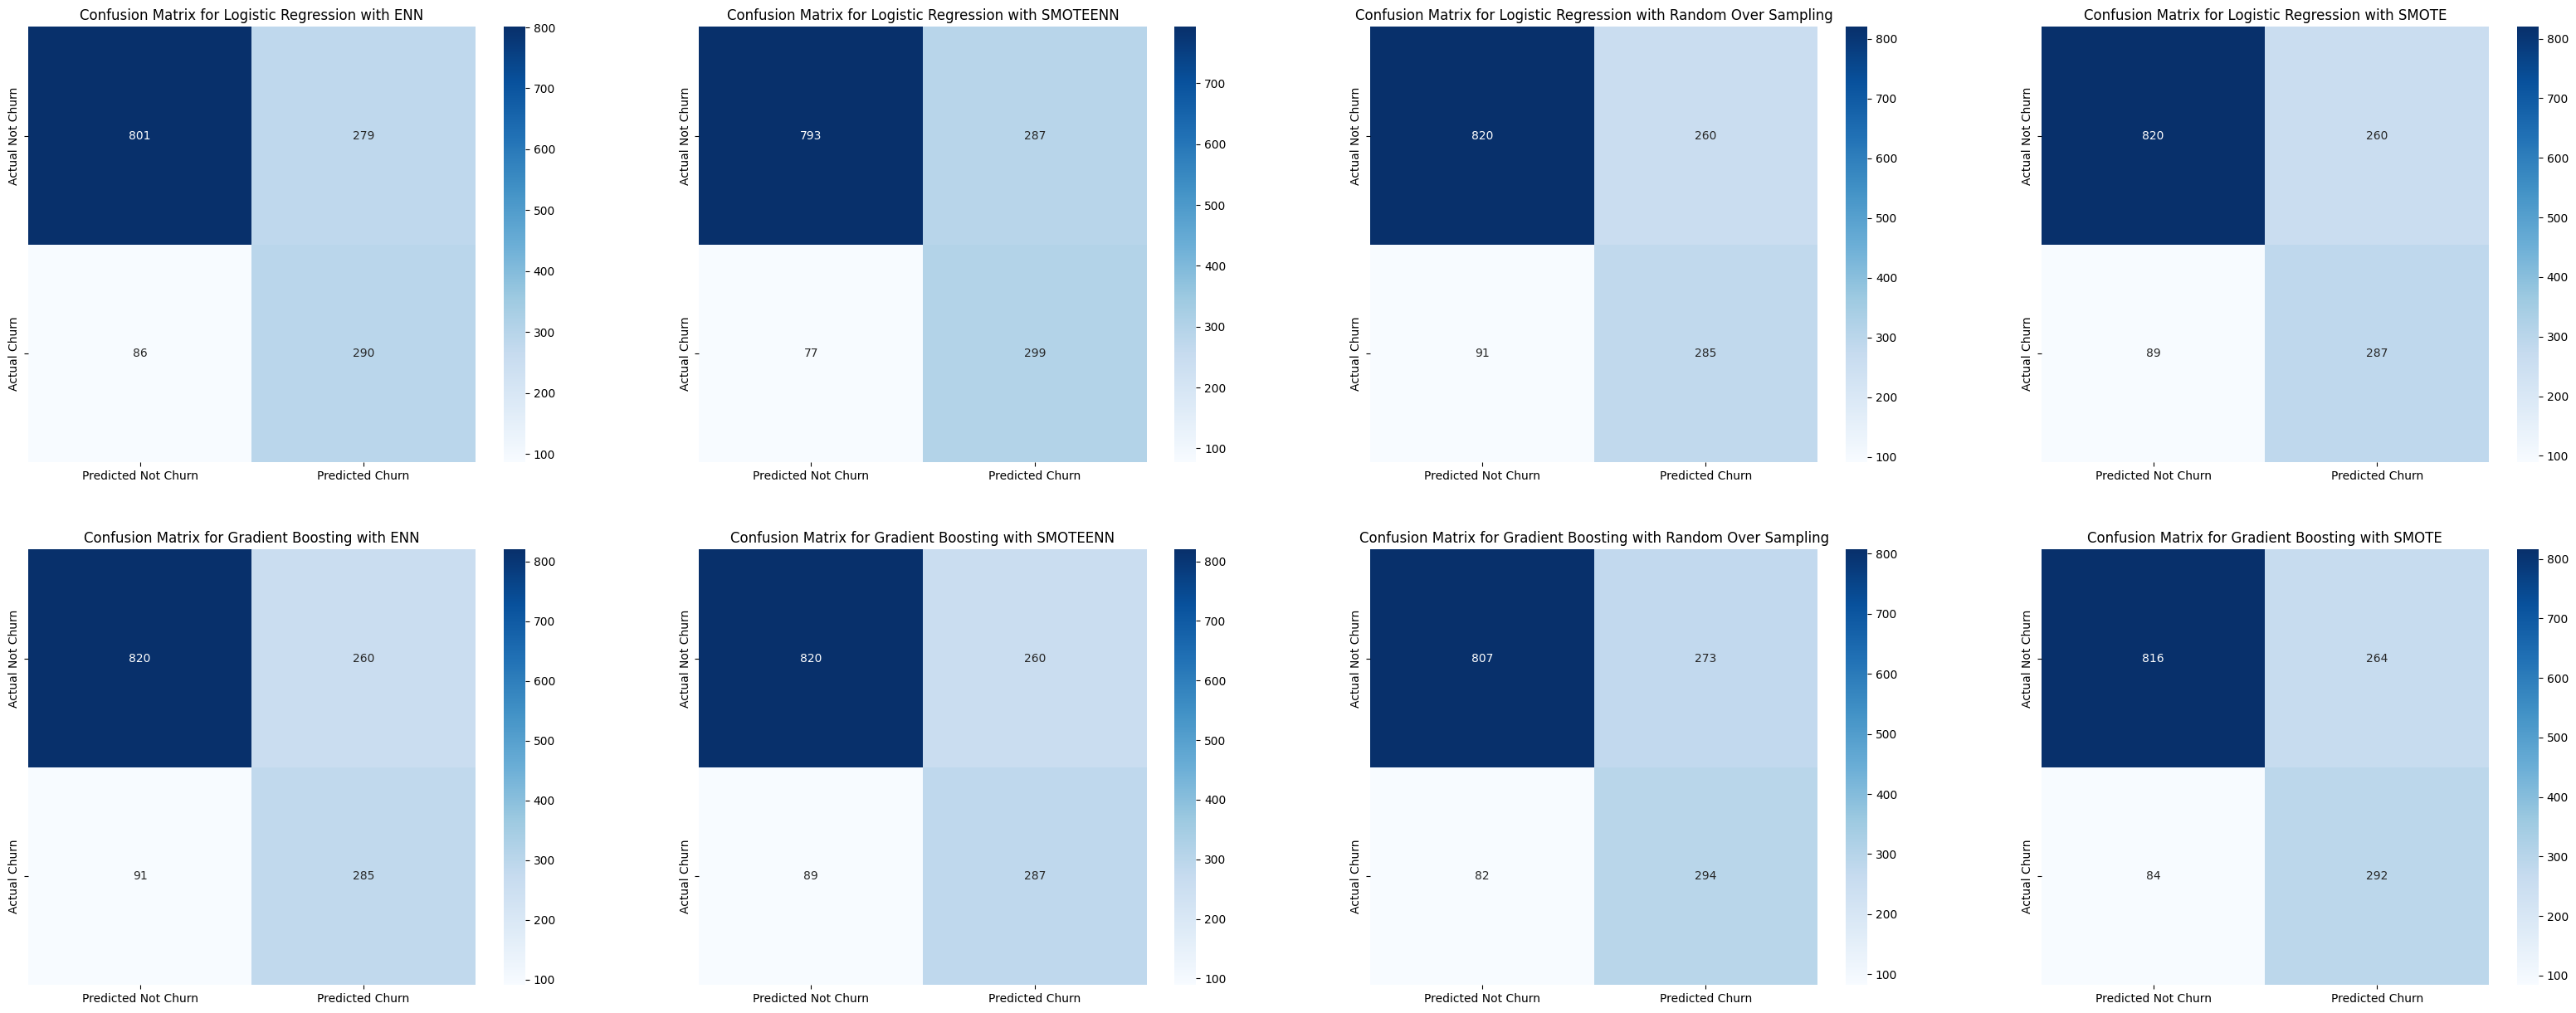

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(40, 15))

for i, (model_name, _) in enumerate(models_test):
    for j, (resample_name, _) in enumerate(resamples_test):
        sns.heatmap(conf_matrix_test[2*i + j], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                    yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} with {resample_name}");

Setelah menerapkan 2 model dengan 4 metode resampling pada data test, diperoleh model dengan nilai recall terbesar adalah model **Logistic Regression dengan SMOTEENN**. Model ini memiliki nilai recall terbesar artinya model ini mampu memprediksi pelanggan yang kemungkinan besar churn dengan baik. Selanjutnya, untuk meningkatkan nilai recall dilakukan hyperparameter tunning pada model ini. 

## **Model Optimalization**

### Hyperparameter Tuning

Metode GridSearchCV adalah metode hyperparameter tuning untuk menemukan nilai parameter optimal. Metode GridSearchCV digunakan dalam analisis karena metode ini mengevaluasi semua kemungkinan kombinasi hyperparameter dibandingkan dengan metode RandomizedSearchCV hanya mencoba sebagian kecil kombinasi yang memungkinkan melewatkan kombinasi hyperparameter terbaik. 

In [111]:
param_grid = {
    'model__penalty': [None, 'l2', 'l1', 'elasticnet'], 
    'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
    'model__max_iter': [200, 500, 1000],
    'model__verbose': [0,1,2]
}

logreg = LogisticRegression(random_state=42)
smoteenn = SMOTEENN(random_state=42)

pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', smoteenn),
            ('model', logreg)
        ])

gridsearch = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid, 
    cv=StratifiedKFold(n_splits=5), 
    scoring = 'recall',  
    n_jobs = -1  
)

gridsearch.fit(X_train, y_train)

c:\Users\ERGIDYA LIVIANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2205 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ERGIDYA LIVIANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ERGIDYA LIVIANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Contract',
                                                                          'Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling',
                                                                          'InternetService']),
                                                                        ('minmax',
                                                                         Mi...
                                                                          'MonthlyCharges'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'model__max_iter': [200, 500, 1000],
                         'model__penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
                         'model__verbose': [0, 1, 2]},
             scoring='recall')

In [112]:
print('Best Hyperparameters: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)

Best Hyperparameters:  {'model__C': 0.01, 'model__max_iter': 200, 'model__penalty': 'l1', 'model__solver': 'saga', 'model__verbose': 0}
Best Score:  0.8410496607217919


In [113]:
logreg_tuning = gridsearch.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Contract', 'Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling',
                                                   'InternetService']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('resampling', SMOTEENN(random_state=42)),
                ('model',
                 LogisticRegression(C=0.01, max_iter=200, penalty='l1',
                                    random_state=42, solver='saga'))])

Kombinasi hyperparameter terbaik dalam analisis ini adalah dengan C sebesar 0.01, max_iter sebesar 200, penalty adalah l1, solver adalah saga, dan verbose sebesar 0.

### Apply to Data Test

In [119]:
y_pred_tuning = logreg_tuning.predict(X_test)

recall_tuning = recall_score(y_test, y_pred_tuning)
f1_tuning = f1_score(y_test, y_pred_tuning)
roc_auc_tuning = roc_auc_score(y_test, y_pred_tuning)
accuracy_tuning = accuracy_score(y_test, y_pred_tuning)
precision_tuning = precision_score(y_test, y_pred_tuning)



logreg_after_tuning = pd.DataFrame({'Recall': recall_tuning,
                                    'F1-score': f1_tuning,
                                    'ROC-AUC': roc_auc_tuning,
                                    'Accuracy': accuracy_tuning,
                                   'Precision': precision_tuning}, index=['Logistic Regression After Tune'])


metrics_df = metrics_df.rename(index={'Logistic Regression with SMOTEENN': 'Logistic Regression Before Tune'})
metrics_df = metrics_df.loc[['Logistic Regression Before Tune']]

metrics_df = pd.concat([logreg_after_tuning, metrics_df])
metrics_df

,Recall,F1-score,ROC-AUC,Accuracy,Precision
Logistic Regression After Tune,0.853723,0.617902,0.768528,0.727335,0.484163
Logistic Regression Before Tune,0.795213,0.621622,0.764736,0.750000,0.510239


Berdasarkan hasil, model Logistic Regression dengan GridSearchCV memperoleh nilai recall sebesar 0.854 atau mengalami peningkatan sebesar 0.059 dari nilai recall sebesar 0.795.

In [147]:
report_tuned = classification_report(y_test, y_pred_tuning)
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79      1080
           1       0.48      0.85      0.62       376

    accuracy                           0.73      1456
   macro avg       0.71      0.77      0.70      1456
weighted avg       0.82      0.73      0.74      1456



Berdasarkan confusion matrix yang diperoleh pada model Logistic Regression dengan SMOTEENN dan setelah digunakan hyperparameter tuning, dapat diketahui bahwa model cukup baik dalam mengidentifikasi pelanggan yang kemungkinan besar churn (recall sebesar 85%). 

### Predict vs Actual

In [122]:
comparison_df = pd.DataFrame({'Actual': y_test,
                              'Predicted': y_pred_tuning})

comparison_df['Correct Prediction'] = comparison_df['Actual'] == comparison_df['Predicted']
comparison_df

,Actual,Predicted,Correct Prediction
3462,0,1,False
4199,0,0,True
2744,0,0,True
2698,0,1,False
844,1,1,True
...,...,...,...
3536,1,1,True
1776,0,1,False
562,0,1,False
945,0,1,False


In [123]:
comparison_df['Correct Prediction'].value_counts()

True     1059
False     397
Name: Correct Prediction, dtype: int64

In [131]:
correct_predictions = comparison_df['Correct Prediction'].sum()
total_predictions = comparison_df.shape[0]
percentage_true = (correct_predictions / total_predictions) * 100
print(f'Persentase Model Berhasil dalam Prediksi: {round(percentage_true,2)}%')

Persentase Model Berhasil dalam Prediksi: 72.73%


Persentase model berhasil dalam memprediksi adalah sebesar 72.73% atau berhasil memprediksi benar sebanyak 1059 dari 1456 data test sehingga dapat dikatakan model ini sudah cukup baik dalam memprediksi. 

### Feature Importance

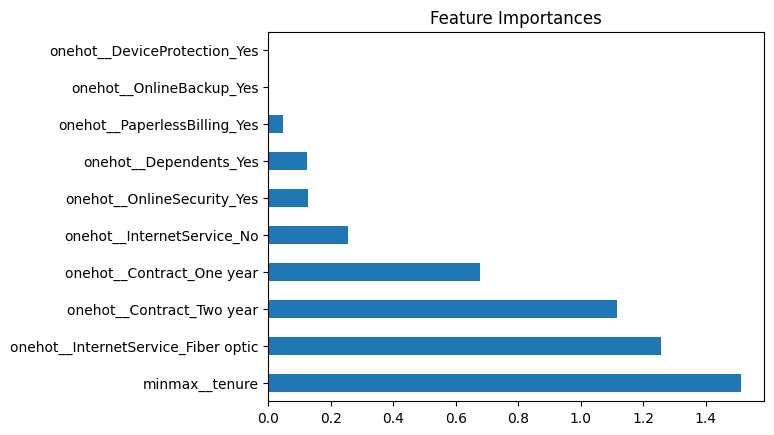

In [149]:
coef1 = pd.Series(logreg_tuning['model'].coef_[0], transformer.get_feature_names_out()).abs().sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan chart tersebut, dapat diketahui:
- Tenure merupakan faktor utama yang memengaruhi churn prediction
- InternetService, Contract (One Year dan Two Year) sangat berpengaruh terhadap churn prediction
- Fitur DeviceProtection, OnlineBackup, dan PaperlessBilling adalah fitur yang memiliki pengaruh lebih kecil dibandingkan fitur lain, tetapi masih cukup penting dalam model.

### Shapley Analysis

Shapley Analysis digunakan untuk melihat kontribusi setiap feature terhadap prediksi. 

c:\Users\ERGIDYA LIVIANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
Estimating transforms: 100%|██████████| 1000/1000 [00:00<00:00, 1291.65it/s]


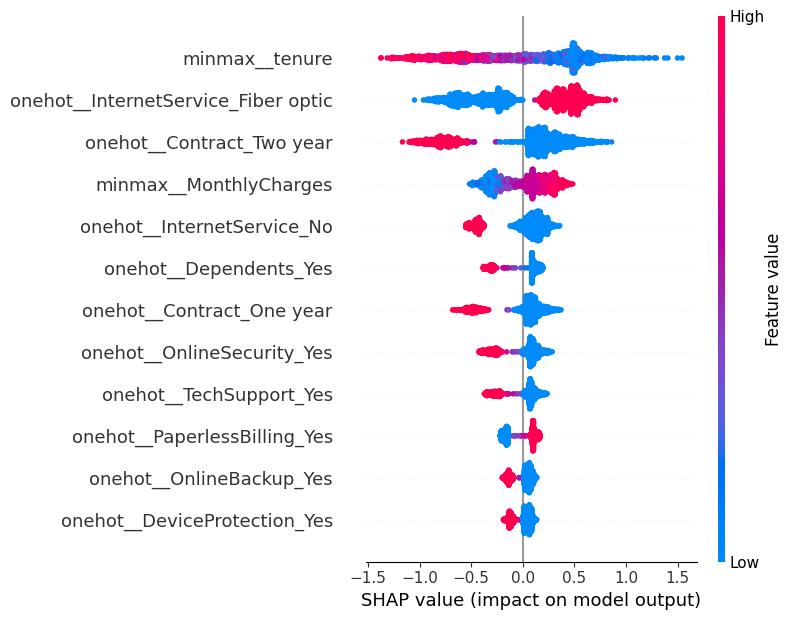

In [139]:
pipeline_trans_resample = Pipeline([
    ('transform', transformer),
    ('resampling', smoteenn)
])

X_train_over, y_train_over = pipeline_trans_resample.fit_resample(X_train, y_train)

model_tuned = logreg_tuning['model']
explainer = shap.LinearExplainer(model_tuned, X_train_over, feature_perturbation="correlation_dependent")
shap_values = explainer.shap_values(X_train_over)

shap.summary_plot(shap_values, X_train_over, feature_names = transformer.get_feature_names_out()) 

Warna pada Shapley plot menunjukkan bagaimana fitur memengaruhi prediksi model (merah menunjukkan nilai fitur tinggi dan biru menunjukkan nilai fitur rendah) serta nilai positif pada sumbu x berarti meningkatkan probabilitas kelas target dan nilai negatif pada sumbu x berarti mengurangi probabilitas kelas target. Berdasarkan plot dapat diketahui fitur yang paling berpengaruh adalah:
- **Tenure** rendah (biru) cenderung meningkatkan probabilitas churn, sedangkan tenure tinggi (merah) menurunkan probabilitas churn.
- **InternetService Fiber Optic** tinggi (merah) memiliki kecenderungan lebih tinggi churn. 
- **Contract Two Year** tinggi cenderung lebih stabil atau jarang churn
- **MonthlyCharges** tinggi (merah) cenderung meningkatkan probabilitas churn
- Pelanggan dengan **OnlineSecurity** dan **TechSupport** (merah) cenderung jarang churn

Dengan demikian, dapat disimpulkan:
- Pelanggan dengan tenure rendah, InternetService Fiber Optic, dan MonthlyCharger tinggi cenderung churn.
- Contract Two Year, OnlineSecurity, dan TechSupport mengurangi churn
- Fitur yang paling berpengaruh adalah tenure, InternetService, Contract, dan MonthlyCharges.

## **Conclusion & Recommendation**

### Conclusion

**Model Performance (Before vs. After Tuning)**
- Model **`Logistic Regression dengan SMOTEENN`** adalah model terbaik dibandingkan model lainnya dengan nilai recall sebelum tuning sebesar 79.5% dan nilai recall setelah tuning sebesar 85.4%. Model ini mampu memprediksi dengan benar sebesar 72.73% dari 1456 data test.
- Model menunjukkan AUC-ROC sebesar 76.9%, artinya model memiliki performa yang cukup baik dalam membedakan pelanggan yang akan churn dan non-churn. 

**Main Factors of Churn**
+ Tenure:
Pelanggan dengan masa berlangganan lebih pendek memiliki kemungkinan lebih besar untuk churn.
+ InternetService Fiber Optic:
Pelanggan dengan layanan Fiber Optic lebih rentan churn dibandingkan pengguna layanan lainnya atau tidak memiliki layanan internet.
+ Contract:
Pelanggan dengan kontrak Month-to-month dan One Year cenderung churn dibandingkan pelanggan dengan kontrak Two Year.
+ MonthlyCharges:
Pelanggan dengan biaya bulanan yang tinggi cenderung churn.
+ Layanan Tambahan (OnlineSecurity, TechSupport, dan OnlineBackup):
Pelanggan yang tidak menggunakan layanan OnlineSecurity, TechSupport, dan OnlineBackup memiliki risiko churn.

**Impact of Churn on Business**
+ Meningkatnya churn rate dapat meningkatkan Customer Acquisition Cost (CAC) atau biaya untuk mendapatkan pelanggan baru lebih besar daripada mempertahankan pelanggan lama. 
+ Kepuasan pelanggan dan citra perusahaan menurun akibat pelanggan lebih memilih perusahaan kompetitor.

### Recommendation

**Strategi Mengurangi Churn Rate**
1. Memberikan promo, paket sesuai kebutuhan, dan promo loyalitas untuk meningkatkan retensi pelanggan. 
2. Meningkatkan kualitas jaringan dan layanan pelanggan. 
3. Menawarkan kontrak yang lebih fleksibel dan pengingat pembayaran yang ramah untuk mengurangi churn. 

**Rekomendasi untuk Selanjutnya**
- Menggunakan data real-time untuk deteksi churn lebih akurat.
- Menggunakan data dari ulasan atau media sosial untuk memahami alasan pelanggan berhenti berlangganan atau churn. 
- Menguji berbagai strategi retensi secara langsung untuk menemukan strategi yang paling efektif.
- Menggunakan model yang lebih kompleks, seperti deep learning, untuk meningkatkan akurasi prediksi. 

## **Save Model**

In [ ]:
# import pickle

# filename = 'model.pkl'
# pickle.dump(logreg_tuning, open(filename, 'wb'))